# 9-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 1. 데이터 가져오기

In [1]:
import os
import numpy as np
import pandas as pd

# 데이터 가져오기
path = os.getenv("HOME")+"/aiffel/bike_regression/data/bike-sharing-demand/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
# datetime 변환 및, 컬럼생성
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.5, 1.0, 'second')

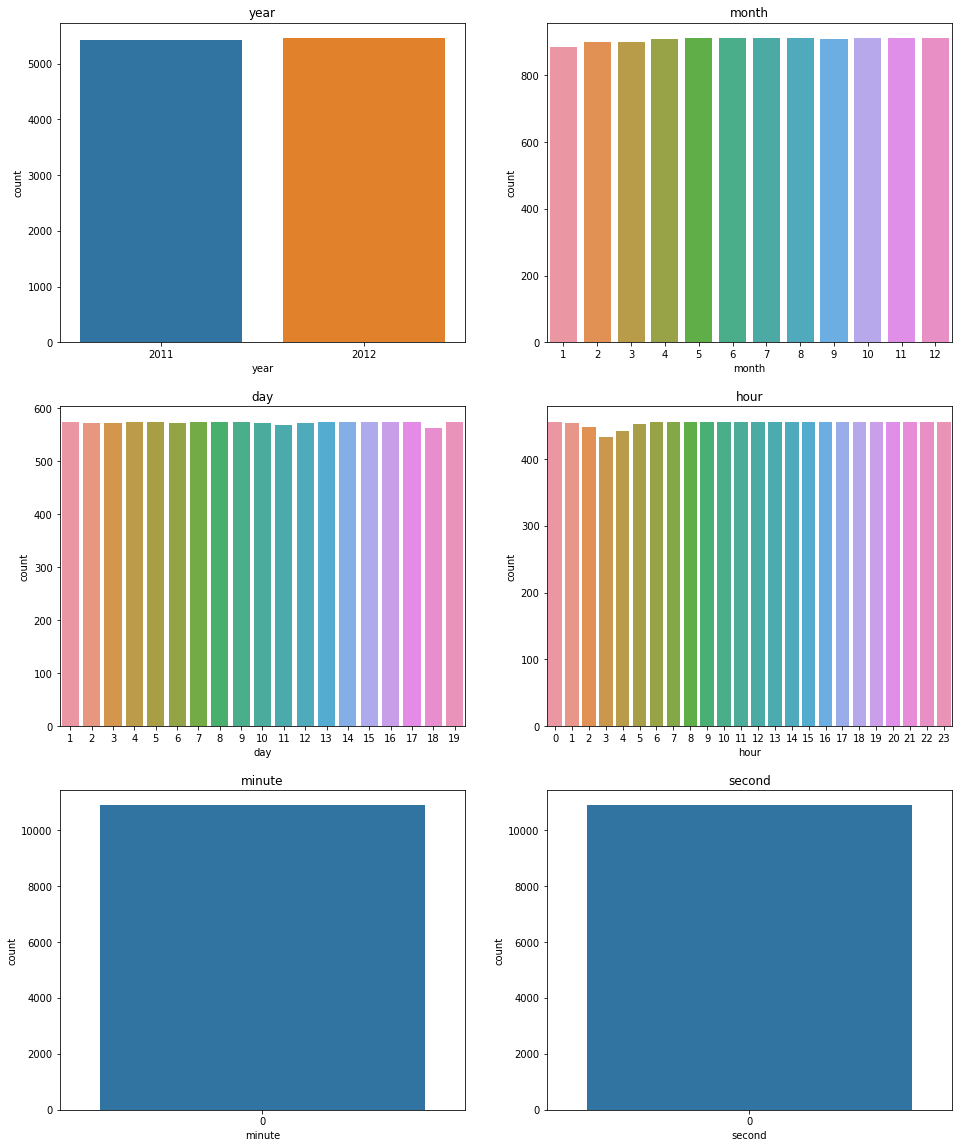

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 개수 시각화

fig, axes = plt.subplots(3,2, figsize=(16,20))

sns.countplot(data=train, x="year", ax=axes[0,0])
axes[0,0].set_title("year")

sns.countplot(data=train, x="month", ax=axes[0,1])
axes[0,1].set_title("month")

sns.countplot(data=train, x="day", ax=axes[1,0])
axes[1,0].set_title("day")

sns.countplot(data=train, x="hour", ax=axes[1,1])
axes[1,1].set_title("hour")

sns.countplot(data=train, x="minute", ax=axes[2,0])
axes[2,0].set_title("minute")

sns.countplot(data=train, x="second", ax=axes[2,1])
axes[2,1].set_title("second")


In [6]:
# 데이터 갯수 숫자 확인
display(train['year'].value_counts())
display(train['month'].value_counts())
display(train['day'].value_counts())
display(train['hour'].value_counts())
display(train['minute'].value_counts())
display(train['second'].value_counts())


2012    5464
2011    5422
Name: year, dtype: int64

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: day, dtype: int64

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

0    10886
Name: minute, dtype: int64

0    10886
Name: second, dtype: int64

#### 분포 확인
날짜 관련 feature들에서는 특별한 인사이트를 발견할 수 없었다.  
날짜 관련 feature에 따른 count를 확인해, 어떤 feature가 영향을 크게 줄 수 있을지 탐색해본다.  

Text(0.5, 1.0, 'second')

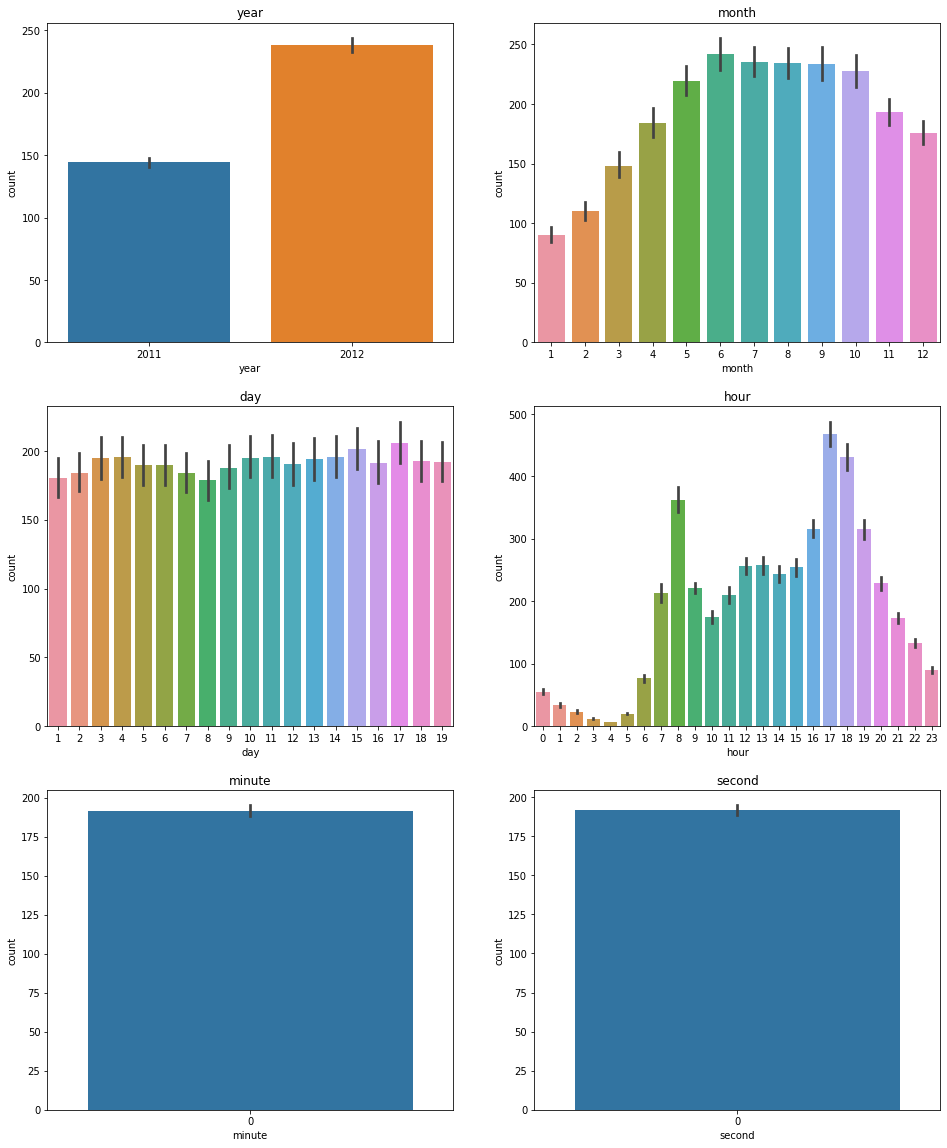

In [7]:
# 날짜 컬럼에 따른 데이터 분포 확인
fig, axes = plt.subplots(3,2, figsize=(16,20))

sns.barplot(data=train, x="year", y="count", ax=axes[0,0])
axes[0,0].set_title("year")

sns.barplot(data=train, x="month",y="count", ax=axes[0,1])
axes[0,1].set_title("month")

sns.barplot(data=train, x="day",y="count", ax=axes[1,0])
axes[1,0].set_title("day")

sns.barplot(data=train, x="hour",y="count", ax=axes[1,1])
axes[1,1].set_title("hour")

sns.barplot(data=train, x="minute",y="count", ax=axes[2,0])
axes[2,0].set_title("minute")

sns.barplot(data=train, x="second",y="count", ax=axes[2,1])
axes[2,1].set_title("second")

## 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [8]:
# 컬럼 확인
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [9]:
# 데이터 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [10]:
# feature 선택
features = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour']
X = train[features]
y = train['count']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 5. LinearRegression 모델 학습

In [12]:
from sklearn.linear_model import LinearRegression

# 모델 생성
linear_regression = LinearRegression()

# 모델 학습
linear_regression.fit(X_train, y_train)

LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [13]:
# 예측
y_pred = linear_regression.predict(X_test)
y_pred

array([209.49227311, 305.09447537, 354.92786128, ..., 198.98199304,
       187.83437751,  62.18103848])

In [14]:
# MSE 함수 생성
def MSE(y_true, y_pred):
    mse = np.mean((y_true-y_pred)**2)
    return mse

In [15]:
MSE(y_test, y_pred)

21407.464398730932

In [16]:
# RMSE

np.sqrt(MSE(y_test, y_pred))

146.31289894855794

## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

Text(0.5, 1.0, 'count by humidity')

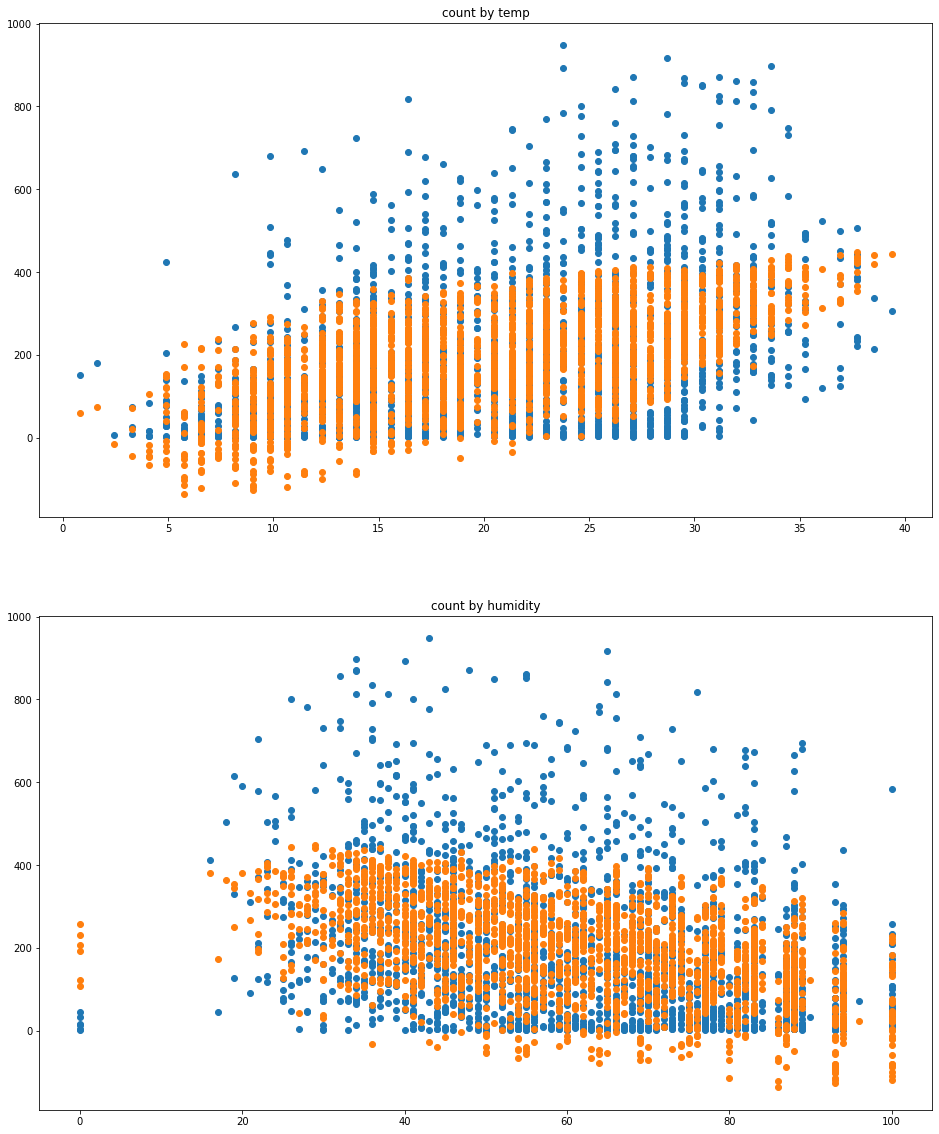

In [17]:
fig, axes = plt.subplots(2,1, figsize=(16,20))

axes[0].scatter(X_test['temp'], y_test, label="true")
axes[0].scatter(X_test['temp'], y_pred, label="pred")
axes[0].set_title("count by temp")

axes[1].scatter(X_test['humidity'], y_test, label='true')
axes[1].scatter(X_test['humidity'], y_pred, label='pred')
axes[1].set_title("count by humidity")

# 회고

- `temp`와 `atemp` 두 feature을 모두 사용하는 것이 적절한지 의문이 들었다. 
-  시간이 부족해 EDA를 충분히 해보지 못하였는데, `temp`와 `atemp` 사이의 상관관계를 분석하여 모델을 개선시킬 수 있을 것 같다.